<h1> Load the data </h1>


In [121]:
import matplotlib.pyplot as plt
from coffea.nanoevents import NanoEventsFactory, DelphesSchema
import numpy as np
import uproot
from hist import Hist, axis
import os


tree_name= "Delphes"  #all of them are named delphes

#Signal
signal_folder = "data/signal/"
signal_filename =  "VBF_DM_My0_1000_MXD_10.root"
signal_file = uproot.open(signal_folder +signal_filename)

#Background
background_folder = "data/bkg/"


#will store data to be used in final "cut chart"
num_cuts = 5
SM_events = [1000,700,200]
NP_events = [500,400,300]
Significance = [1,2.4,5]
    #all this is temp for now




<h1> Bins </h1>

In [122]:
binning = {
    "PT": {"range": (20, 300), "bins": 14},  # (300 - 20) / 20 = 14 bins
    "Eta*Eta": {"range": (-25, 25), "bins": 500},  # (25 - (-25)) / 0.1 = 500 bins
    "Delta_Eta": {"range": (0, 10), "bins": 100},  # (10 - 0) / 0.1 = 100 bins
    "Transverse": {"range": (500, 2000), "bins": 75},  # (2000 - 500) / 20 = 75 bins
    "Eta": {"range": (-5, 5), "bins": 100},  # (5 - (-5)) / 0.1 = 100 bins
    "Phi": {"range": (0, 2 * np.pi), "bins": 63}  # (2 * pi - 0) / 0.1 = 63 bins
}

plt.figure(figsize=(10, 6))



<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<h1> Plot Everything</h1>

<h3> MET met <h3>

<h3> MET Phi </h3>

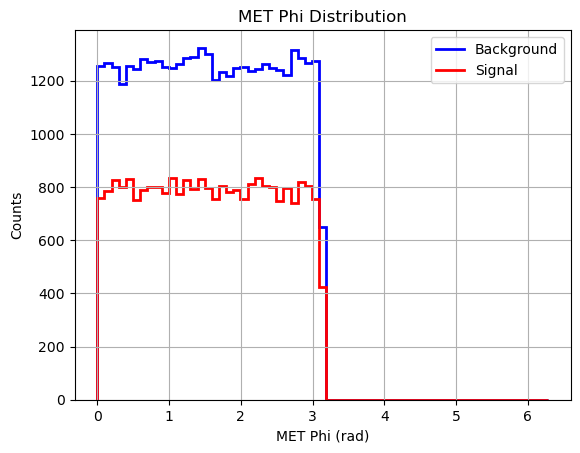

In [123]:
# Create histograms
met_phi_hist_background = Hist(
    axis.Regular(binning["Phi"]["bins"], *binning["Phi"]["range"], name="MET_Phi", label="MET Phi (rad)")
)
met_phi_hist_signal = Hist(
    axis.Regular(binning["Phi"]["bins"], *binning["Phi"]["range"], name="MET_Phi", label="MET Phi (rad)")
)

#Signal
#Signal Data
signal_tree = signal_file[tree_name]
signal_weights = signal_tree["Event/Event.Weight"].array(library="np")
normalized_signal_weights = signal_weights / np.mean(signal_weights)

signal_met_phi = signal_tree["MissingET.Phi"].array(library="np")
met_phi_hist_signal.fill(MET_Phi=signal_met_phi,weight = normalized_signal_weights)


#Background
for root_file in os.listdir(background_folder):
    if root_file.endswith(".root"):
        file_path = os.path.join(background_folder, root_file)
        background_file = uproot.open(file_path)
        background_tree = background_file[tree_name]

        background_weights = background_tree["Event/Event.Weight"].array(library="np")
        normalized_background_weights = background_weights / np.mean(background_weights)

        background_met_phi = background_tree["MissingET.Phi"].array(library="np")
        met_phi_hist_background.fill(MET_Phi=background_met_phi,weight = normalized_background_weights)
        



#Set up histogram

# Background histogram
plt.stairs(
    met_phi_hist_background.values(),
    met_phi_hist_background.axes[0].edges,
    color='blue',
    label='Background',
    linewidth=2
)

# Signal histogram
plt.stairs(
    met_phi_hist_signal.values(),
    met_phi_hist_signal.axes[0].edges,
    color='red',
    label='Signal',
    linewidth=2
)

# Add labels and legend
plt.xlabel('MET Phi (rad)')
plt.ylabel('Counts')
plt.title('MET Phi Distribution')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

<h2> Jets </h2>

<h3> PT(j0) , PT(j1) </h3>

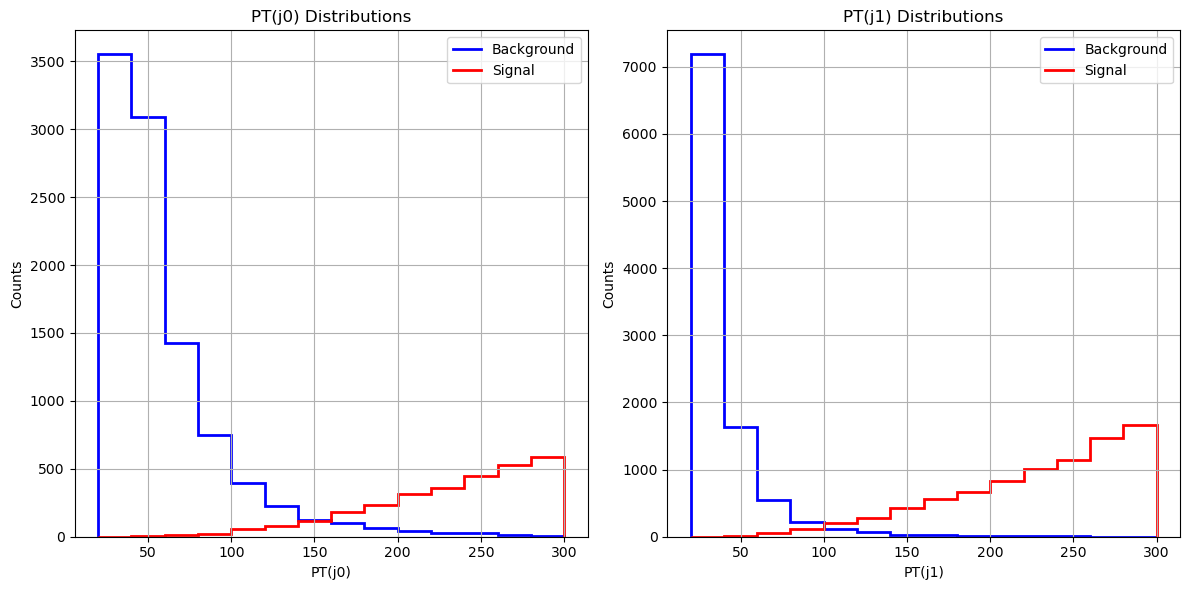

In [151]:
# Create histograms

#J0
pt_j0_hist_background = Hist(
    axis.Regular(binning["PT"]["bins"], *binning["PT"]["range"], name="PT_J0", label="PT_J0")
)
pt_j0_hist_signal = Hist(
    axis.Regular(binning["PT"]["bins"], *binning["PT"]["range"], name="PT_J0", label="PT_J0")
)

#J1
pt_j1_hist_background = Hist(
    axis.Regular(binning["PT"]["bins"], *binning["PT"]["range"], name="PT_J1", label="PT_J1")
)
pt_j1_hist_signal = Hist(
    axis.Regular(binning["PT"]["bins"], *binning["PT"]["range"], name="PT_J1", label="PT_J1")
)


# Signal processing
signal_jets_pt = signal_tree["Jet.PT"].array(library="np")
signal_filtered_jets_pt = [entry for entry in signal_jets_pt if len(entry) >= 2]  # At least two entries
signal_pt_j0 = np.array([entry[0] for entry in signal_filtered_jets_pt])
signal_pt_j1 = np.array([entry[1] for entry in signal_filtered_jets_pt])

# Ensure weights match the number of entries in filtered data
valid_indices = [i for i, entry in enumerate(signal_jets_pt) if len(entry) >= 2]
signal_weights_filtered = np.array([signal_weights[i] for i in valid_indices])
normalized_signal_weights_filtered = signal_weights_filtered / np.mean(signal_weights_filtered)

pt_j0_hist_signal.fill(PT_J0=signal_pt_j0, weight=normalized_signal_weights_filtered[:len(signal_pt_j0)])
pt_j1_hist_signal.fill(PT_J1=signal_pt_j1, weight=normalized_signal_weights_filtered[:len(signal_pt_j1)])


# Background processing
for root_file in os.listdir(background_folder):
    if root_file.endswith(".root"):
        file_path = os.path.join(background_folder, root_file)
        background_file = uproot.open(file_path)
        background_tree = background_file[tree_name]

        # Extract and normalize weights
        background_weights = background_tree["Event/Event.Weight"].array(library="np")
        #normalized_background_weights = background_weights / np.mean(background_weights)
        
        # Extract and filter jet PT
        background_jets_pt = background_tree["Jet.PT"].array(library="np")
        background_filtered_jets_pt = [entry for entry in background_jets_pt if len(entry) >= 2]  # At least two entries
        
        # Extract PT J0 and PT J1
        background_pt_j0 = np.array([entry[0] for entry in background_filtered_jets_pt])
        background_pt_j1 = np.array([entry[1] for entry in background_filtered_jets_pt])

        # Ensure weights match the entries in filtered data
        valid_indices = [i for i, entry in enumerate(background_jets_pt) if len(entry) >= 2]
        filtered_weights = np.array([background_weights[i] for i in valid_indices])
        normalized_bkg_filtered_weights = filtered_weights / np.mean(filtered_weights)
        
        # Make sure filtered weights are aligned with filtered data
        if len(background_pt_j0) <= len(normalized_bkg_filtered_weights):
            pt_j0_hist_background.fill(PT_J0=background_pt_j0, weight=normalized_bkg_filtered_weights[:len(background_pt_j0)])
            pt_j1_hist_background.fill(PT_J1=background_pt_j1, weight=normalized_bkg_filtered_weights[:len(background_pt_j1)])

    

# Create a figure and a set of subplots (2 columns, 1 row)
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot PT(j0) Distributions on the first subplot
axs[0].stairs(
    pt_j0_hist_background.values(),
    pt_j0_hist_background.axes[0].edges,
    color='blue',
    label='Background',
    linewidth=2
)
axs[0].stairs(
    pt_j0_hist_signal.values(),
    pt_j0_hist_signal.axes[0].edges,
    color='red',
    label='Signal',
    linewidth=2
)
axs[0].set_xlabel('PT(j0)')
axs[0].set_ylabel('Counts')
axs[0].set_title('PT(j0) Distributions')
axs[0].legend()
axs[0].grid(True)

# Plot PT(j1) Distributions on the second subplot
axs[1].stairs(
    pt_j1_hist_background.values(),
    pt_j1_hist_background.axes[0].edges,
    color='blue',
    label='Background',
    linewidth=2
)
axs[1].stairs(
    pt_j1_hist_signal.values(),
    pt_j1_hist_signal.axes[0].edges,
    color='red',
    label='Signal',
    linewidth=2
)
axs[1].set_xlabel('PT(j1)')
axs[1].set_ylabel('Counts')
axs[1].set_title('PT(j1) Distributions')
axs[1].legend()
axs[1].grid(True)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()



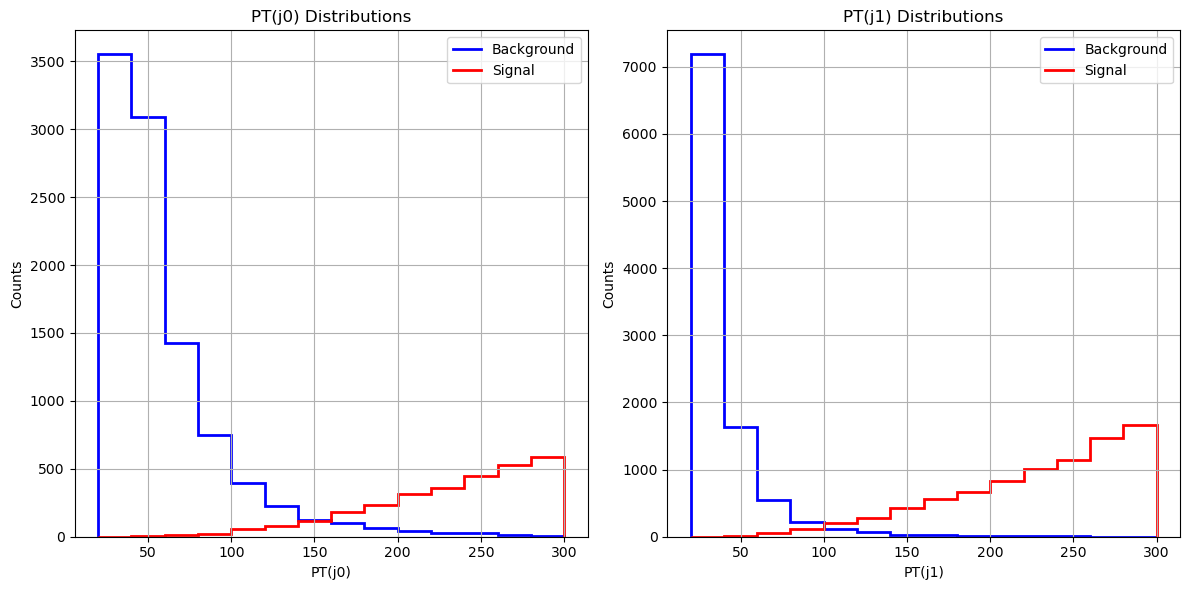

In [153]:
def JetPlots(binname, dataname ):
    # Create histograms

    j0_hist_background = Hist(
        axis.Regular(binning[binname]["bins"], *binning[binname]["range"], name="thedata", label=dataname+"J0")
    )
    j0_hist_signal = Hist(
        axis.Regular(binning[binname]["bins"], *binning[binname]["range"], name="thedata", label=dataname+"J0")
    )

    #J1
    j1_hist_background = Hist(
        axis.Regular(binning[binname]["bins"], *binning[binname]["range"], name="thedata", label=dataname+"J1")
    )
    j1_hist_signal = Hist(
        axis.Regular(binning[binname]["bins"], *binning["PT"]["range"], name="thedata", label=dataname+"J1")
    )


    # Signal processing
    signal_jets = signal_tree["Jet."+dataname].array(library="np")
    signal_filtered_jets = [entry for entry in signal_jets if len(entry) >= 2]  # At least two entries
    signal_j0 = np.array([entry[0] for entry in signal_filtered_jets])
    signal_j1 = np.array([entry[1] for entry in signal_filtered_jets])

    # Ensure weights match the number of entries in filtered data
    valid_indices = [i for i, entry in enumerate(signal_jets_pt) if len(entry) >= 2]
    signal_weights_filtered = np.array([signal_weights[i] for i in valid_indices])
    normalized_signal_weights_filtered = signal_weights_filtered / np.mean(signal_weights_filtered)

    j0_hist_signal.fill(thedata=signal_j0, weight=normalized_signal_weights_filtered[:len(signal_j0)])
    j1_hist_signal.fill(thedata=signal_j1, weight=normalized_signal_weights_filtered[:len(signal_j1)])


    # Background processing
    for root_file in os.listdir(background_folder):
        if root_file.endswith(".root"):
            file_path = os.path.join(background_folder, root_file)
            background_file = uproot.open(file_path)
            background_tree = background_file[tree_name]

            # Extract and normalize weights
            background_weights = background_tree["Event/Event.Weight"].array(library="np")
            
            # Extract and filter jet PT
            background_jets = background_tree["Jet."+dataname].array(library="np")
            background_filtered_jets = [entry for entry in background_jets if len(entry) >= 2]  # At least two entries
            
            # Extract PT J0 and PT J1
            background_j0 = np.array([entry[0] for entry in background_filtered_jets])
            background_j1 = np.array([entry[1] for entry in background_filtered_jets])

            # Ensure weights match the entries in filtered data
            valid_indices = [i for i, entry in enumerate(background_jets) if len(entry) >= 2]
            filtered_weights = np.array([background_weights[i] for i in valid_indices])
            normalized_bkg_filtered_weights = filtered_weights / np.mean(filtered_weights)
            
            # Make sure filtered weights are aligned with filtered data
            if len(background_j0) <= len(normalized_bkg_filtered_weights):
                j0_hist_background.fill(thedata=background_j0, weight=normalized_bkg_filtered_weights[:len(background_j0)])
                j1_hist_background.fill(thedata=background_j1, weight=normalized_bkg_filtered_weights[:len(background_j1)])

        

    # Create a figure and a set of subplots (2 columns, 1 row)
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    # Plot PT(j0) Distributions on the first subplot
    axs[0].stairs(
        j0_hist_background.values(),
        j0_hist_background.axes[0].edges,
        color='blue',
        label='Background',
        linewidth=2
    )
    axs[0].stairs(
        j0_hist_signal.values(),
        j0_hist_signal.axes[0].edges,
        color='red',
        label='Signal',
        linewidth=2
    )
    axs[0].set_xlabel(dataname+'(j0)')
    axs[0].set_ylabel('Counts')
    axs[0].set_title(dataname+'(j0) Distributions')
    axs[0].legend()
    axs[0].grid(True)

    # Plot PT(j1) Distributions on the second subplot
    axs[1].stairs(
        j1_hist_background.values(),
        j1_hist_background.axes[0].edges,
        color='blue',
        label='Background',
        linewidth=2
    )
    axs[1].stairs(
        j1_hist_signal.values(),
        j1_hist_signal.axes[0].edges,
        color='red',
        label='Signal',
        linewidth=2
    )
    axs[1].set_xlabel(dataname+'(j1)')
    axs[1].set_ylabel('Counts')
    axs[1].set_title(dataname+'(j1) Distributions')
    axs[1].legend()
    axs[1].grid(True)

    # Adjust layout
    plt.tight_layout()

    # Show the plot
    plt.show()


JetPlots(binname="PT", dataname="PT")

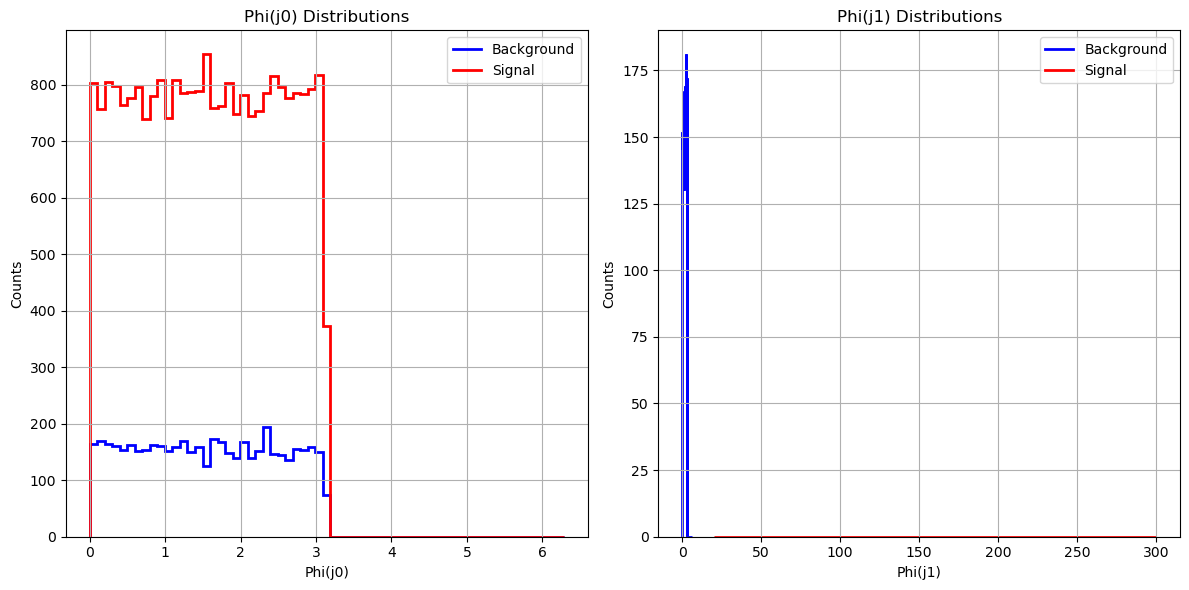

In [154]:

JetPlots(binname="Phi", dataname="Phi")

<h1> Step 3: Iteratively Plot, then Cut <h1>

In [21]:
#Testing stuff

#this is how I might make a cut
trial = signalevents['Jet'][signalevents.Jet.PT > 30].compute()['PT']
trial


<b> $\eta$($j_0$) *  $\eta$($j_1$) </b>

<b> abs($\Delta$($j_0$,$j_1$)) </b>

<b>Pt($j_0$) </b>

<b>Pt($j_1$)</b>

<b> $M_{ET}$, <b>

<h1>Step 5: Compile full Cut Chart </h1>

In [ ]:

column_width = 12  

# Create the grid header
header_row = f"{'Cut #':^{column_width}} | {'SM Events':^{column_width}} | {'NP Events':^{column_width}} | {'Significance':^{column_width}}"
print(header_row)

# Print a separator line
print("-" * (len(header_row) + 1))

#Initial Conditions
init_data = f"{'    Init':{column_width}} | {SM_events[0]:^{column_width}} | {NP_events[0]:^{column_width}} | {Significance[0]:^{column_width}.2f}"  # 
print(init_data)

# Iterate through data and format each row
for i in range(1, num_cuts):  # Use range(1, num_cuts+1) for 1 to num_cuts (inclusive)
    row_data = f"{i:{column_width}} | {SM_events[i]:^{column_width}} | {NP_events[i]:^{column_width}} | {Significance[i]:^{column_width}.2f}" 
    print(row_data)


